<a href="https://colab.research.google.com/github/kibarmustofa/2341720034_ML_2025/blob/main/JS13/TG_JS13_2341720034_KIBARMUSTOFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS LAB

Nama  : Kibar Mustofa

NIM   : 2341720034

Absen : 17

## Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

## Load Dataset MNIST

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: (60000, 28, 28) (60000,)
Test : (10000, 28, 28) (10000,)


## Pra-Pemrosesan Data

### Normalisasi (0–1)

In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Flatten Citra (28×28 → 784 fitur)

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test  = X_test.reshape(-1, 28*28)

### One-hot encoding label

In [ ]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

## Arsitektur ANN

In [ ]:
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compile Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Training Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8749 - loss: 0.4364 - val_accuracy: 0.9672 - val_loss: 0.1054
Epoch 2/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9702 - loss: 0.0951 - val_accuracy: 0.9727 - val_loss: 0.0915
Epoch 3/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9798 - loss: 0.0623 - val_accuracy: 0.9807 - val_loss: 0.0733
Epoch 4/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9858 - loss: 0.0432 - val_accuracy: 0.9752 - val_loss: 0.0921
Epoch 5/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9760 - val_loss: 0.0839
Epoch 6/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9810 - val_loss: 0.0736
Epoch 7/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9931 - loss: 0.0207 - val_accuracy: 0.9795 - val_loss: 0.0867
Epoch 8/15
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.

## Evaluasi Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Akurasi Test:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.1259
Akurasi Test: 0.9781000018119812


## Prediksi dan Confusion Matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


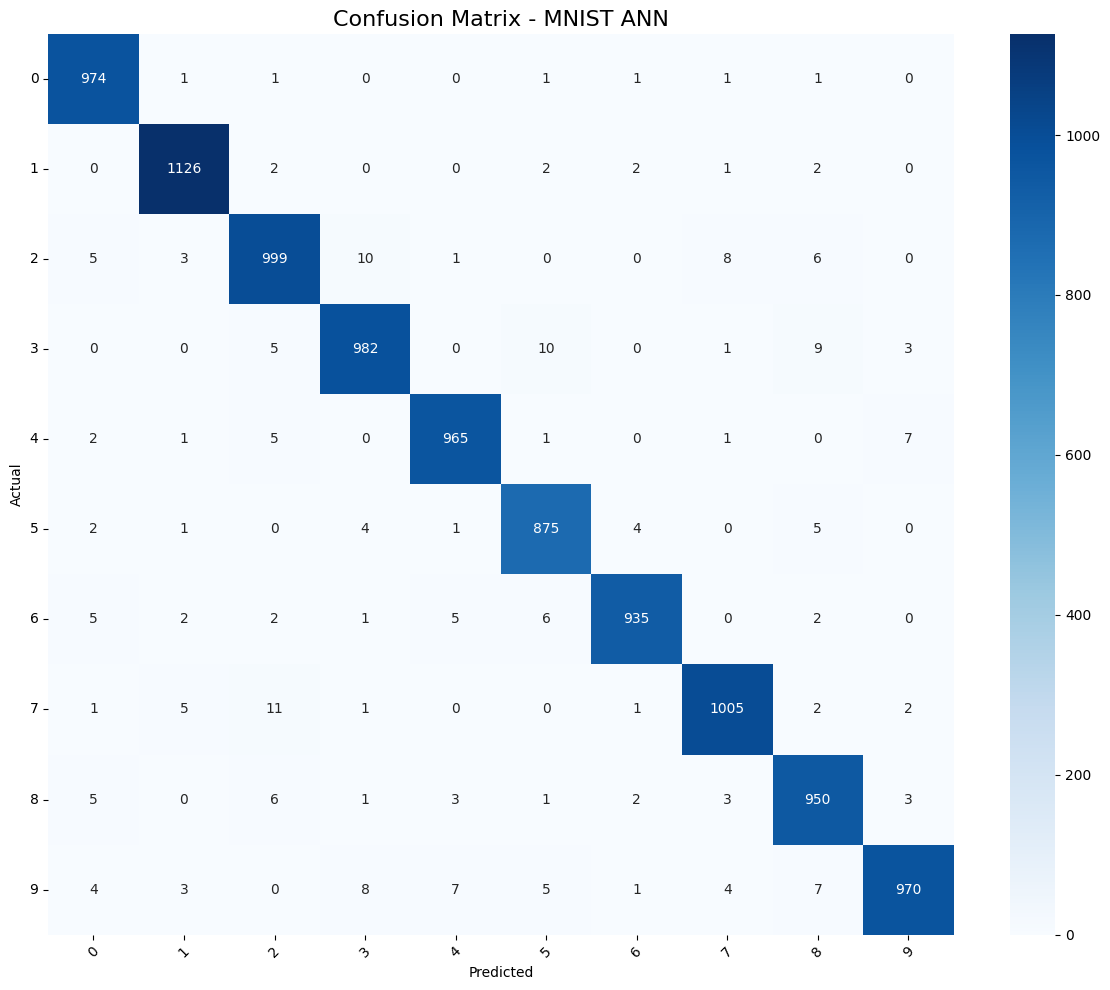

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

class_names = [str(i) for i in range(10)]

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.title("Confusion Matrix - MNIST ANN", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Visualisasi Akurasi dan Loss

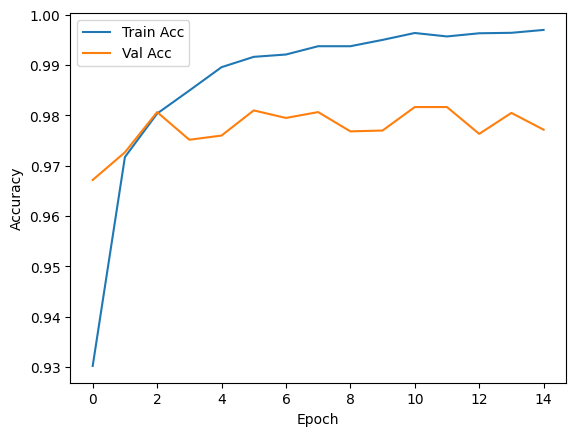

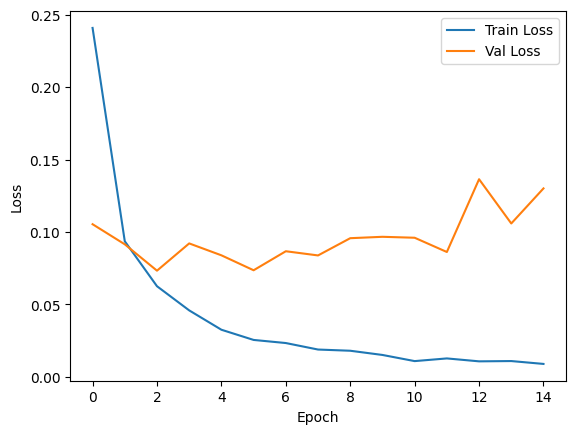

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()